In [1]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import numpy.ma as ma

import calendar
import time
from scipy.stats import gmean

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:

# run installed version of flopy or add local path
try:
    import flopy
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference
    from flopy.utils import Raster
except:
    import flopy
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference
    from flopy.utils import Raster
from flopy.utils.gridgen import Gridgen
from flopy.utils import OptionBlock
import flopy.utils.binaryfile as bf


print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.19.2
matplotlib version: 3.3.4
flopy version: 3.3.4


In [3]:
## Set up directory referencing
# Package data
gwfm_dir = os.path.dirname(os.path.dirname(os.getcwd()))
gwfm_dir

'C:\\Users\\ajcalder\\Box\\research_cosumnes\\GWFlowModel'

In [4]:
parent_grid = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')


In [5]:
# loadpth = 'C:/WRDAPP/GWFlowModel/Cosumnes_Blodgett_10yr/'
loadpth = 'F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/'
model_ws = loadpth+'WEL_SFR_RCH_layercake'
# packages = ['DIS','BAS6','LPF','GHB','CHD']

# loadpth = 'F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_simple/'
# model_ws = loadpth+'WEL_SFR_RCH_layercake'

model_ws
m_p = flopy.modflow.Modflow.load('MF.nam',model_ws = model_ws, verbose=False)


Creating new model with name: MF
--------------------------------------------------

Parsing the namefile --> F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.nam

--------------------------------------------------
External unit dictionary:
{2: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.list, filetype:LIST, 11: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.dis, filetype:DIS, 13: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.bas, filetype:BAS6, 15: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.lpf, filetype:LPF, 17: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.sfr, filetype:SFR, 56: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake\MF.tab, filetype:DATA, 23: filename:F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodg

   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    67
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    68
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    69
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    70
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    71
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    72
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    73
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    74
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    75
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    76
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    77
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    78
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    79
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper    80
   loading <class 'flopy.modflow.mfchd.ModflowChd'> for kper  

   loading rech stress period   8...
   loading rech stress period   9...
   loading rech stress period  10...
   loading rech stress period  11...
   loading rech stress period  12...
   loading rech stress period  13...
   loading rech stress period  14...
   loading rech stress period  15...
   loading rech stress period  16...
   loading rech stress period  17...
   loading rech stress period  18...
   loading rech stress period  19...
   loading rech stress period  20...
   loading rech stress period  21...
   loading rech stress period  22...
   loading rech stress period  23...
   loading rech stress period  24...
   loading rech stress period  25...
   loading rech stress period  26...
   loading rech stress period  27...
   loading rech stress period  28...
   loading rech stress period  29...
   loading rech stress period  30...
   loading rech stress period  31...
   loading rech stress period  32...
   loading rech stress period  33...
   loading rech stress period  34...
 

   loading rech stress period 233...
   loading rech stress period 234...
   loading rech stress period 235...
   loading rech stress period 236...
   loading rech stress period 237...
   loading rech stress period 238...
   loading rech stress period 239...
   loading rech stress period 240...
   loading rech stress period 241...
   loading rech stress period 242...
   loading rech stress period 243...
   loading rech stress period 244...
   loading rech stress period 245...
   loading rech stress period 246...
   loading rech stress period 247...
   loading rech stress period 248...
   loading rech stress period 249...
   loading rech stress period 250...
   loading rech stress period 251...
   loading rech stress period 252...
   loading rech stress period 253...
   loading rech stress period 254...
   loading rech stress period 255...
   loading rech stress period 256...
   loading rech stress period 257...
   loading rech stress period 258...
   loading rech stress period 259...
 

   loading rech stress period 466...
   loading rech stress period 467...
   loading rech stress period 468...
   loading rech stress period 469...
   loading rech stress period 470...
   loading rech stress period 471...
   loading rech stress period 472...
   loading rech stress period 473...
   loading rech stress period 474...
   loading rech stress period 475...
   loading rech stress period 476...
   loading rech stress period 477...
   loading rech stress period 478...
   loading rech stress period 479...
   loading rech stress period 480...
   loading rech stress period 481...
   loading rech stress period 482...
   loading rech stress period 483...
   loading rech stress period 484...
   loading rech stress period 485...
   loading rech stress period 486...
   loading rech stress period 487...
   loading rech stress period 488...
   loading rech stress period 489...
   loading rech stress period 490...
   loading rech stress period 491...
   loading rech stress period 492...
 

   loading rech stress period 696...
   loading rech stress period 697...
   loading rech stress period 698...
   loading rech stress period 699...
   loading rech stress period 700...
   loading rech stress period 701...
   loading rech stress period 702...
   loading rech stress period 703...
   loading rech stress period 704...
   loading rech stress period 705...
   loading rech stress period 706...
   loading rech stress period 707...
   loading rech stress period 708...
   loading rech stress period 709...
   loading rech stress period 710...
   loading rech stress period 711...
   loading rech stress period 712...
   loading rech stress period 713...
   loading rech stress period 714...
   loading rech stress period 715...
   loading rech stress period 716...
   loading rech stress period 717...
   loading rech stress period 718...
   loading rech stress period 719...
   loading rech stress period 720...
   loading rech stress period 721...
   loading rech stress period 722...
 

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   103
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   104
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   105
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   106
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   107
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   108
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   109
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   110
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   111
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   112
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   113
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   114
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   115
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   116
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper  

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   226
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   227
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   228
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   229
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   230
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   231
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   232
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   233
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   234
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   235
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   236
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   237
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   238
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   239
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper  

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   350
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   351
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   352
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   353
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   354
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   355
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   356
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   357
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   358
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   359
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   360
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   361
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   362
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   363
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper  

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   476
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   477
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   478
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   479
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   480
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   481
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   482
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   483
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   484
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   485
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   486
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   487
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   488
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   489
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper  

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   599
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   600
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   601
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   602
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   603
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   604
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   605
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   606
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   607
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   608
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   609
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   610
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   611
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   612
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper  

   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   730
   loading <class 'flopy.modflow.mfwel.ModflowWel'> for kper   731
adding Package:  WEL
   WEL  package load...success
loading hob package file...
Adding MF.hob.out (unit=50) to the output list.
adding Package:  HOB
   HOB  package load...success
loading oc package file...
Adding MF.hds (unit=51) to the output list.
adding Package:  OC
   OC   package load...success
loading pcg package file...
adding Package:  PCG
   PCG  package load...success
   DATA(BINARY) package load...skipped
      MF.cbc
   DATA package load...skipped
      MF.sfr.out
   DATA package load...skipped
      MF.hob.out
   DATA(BINARY) package load...skipped
      MF.hds

    External file unit 0 does not exist in ext_unit_dict.

   The following 11 packages were successfully loaded.
      MF.dis
      MF.bas
      MF.lpf
      MF.sfr
      MF.ghb
      MF.chd
      MF.rch
      MF.wel
      MF.hob
      MF.oc
      MF.pcg
   The following 1 packages

# Set begin and end of grid refinement
Start 5 rows above and 5 columns below Blodgett Dam and end 5 rows below and 5 columns above Blodgett Dam

In [6]:
dam_row = 51
dam_col = 151
xy = gpd.GeoDataFrame(geometry=gpd.points_from_xy([m_p.modelgrid.xyzvertices[0][dam_row,dam_col]],
                                                  [m_p.modelgrid.xyzvertices[1][dam_row,dam_col]]))

xy = gpd.GeoDataFrame(geometry=gpd.points_from_xy([m_p.modelgrid.xyzcellcenters[0][dam_row,dam_col]],
                                                  [m_p.modelgrid.xyzcellcenters[1][dam_row,dam_col]]))

xy.crs='epsg:32610'


In [7]:
num_cells = 8
beg_row= dam_row - num_cells + 1
end_row= dam_row + num_cells + 1
beg_col = dam_col - num_cells + 1
end_col = dam_col + num_cells + 1 

beg_lay = 0
end_lay = 1

In [8]:
child_grid = parent_grid.loc[(parent_grid.row>=beg_row)&(parent_grid.row<end_row)]
child_grid = child_grid.loc[(child_grid.column>=beg_col)&(child_grid.column<end_col)]

child_grid = child_grid.rename({'node':'p_node','row':'p_row','column':'p_column'},axis=1)

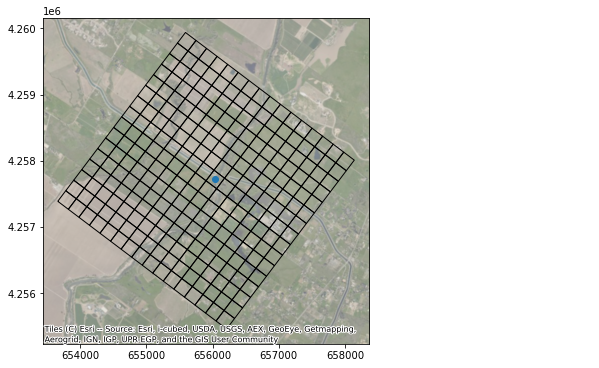

In [9]:
fig,ax=plt.subplots(figsize=(6,6))

child_grid.plot(ax=ax,color='None', edgecolor='black')

xy.plot(ax=ax)

# xy.plot(ax=ax)
# xmin,ymin, xmax, ymax = xy.buffer(2000).total_bounds
# xmin, ymin = xy.buffer(400).total_bounds[0:2]

# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery,
                crs='epsg:26910', alpha = 0.6)


# parent_grid.plot(ax=ax,color='None', edgecolor='black')
# child_grid.plot(ax=ax,color='None', edgecolor='black')


# Create child model based on parent
No side boundary conditions using GHB, CHD needed. These will be applied using the BFH package from LGR.  
Packages to implement are BAS6 to identify connections with the parent grid, LPF to show refined geology, the LAK for Blodgett Dam and SFR for the Cosumnes River, and potentially the RCH and WEL package if the refined area is large enough but as the BFH should set the boundary heads and because the area is so small groundwater levels should be near uniform except for mounding under the river.

In [ ]:
# nrow = 2*(end_row - beg_row + 1)
# ncol = 2*(end_col - beg_col + 1)

In [10]:
rotation = 52.9
proj4_str='+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs '

ncpp = 4
ncol = ncpp*(child_grid.p_column.max() - child_grid.p_column.min()+1)
nrow = ncpp*(child_grid.p_row.max() - child_grid.p_row.min()+1)

def make_delrc(n, ncpp, parent_delrc):
    delrc = np.zeros(n)
    for i in np.arange(0,ncpp):
        delrc[i::ncpp] = parent_delrc/ncpp
    return(delrc)
# referencing to end_col, end_row ends 1 before
delr = make_delrc(nrow, ncpp, m_p.dis.delr.array[beg_col:end_col])
delc = make_delrc(ncol, ncpp, m_p.dis.delc.array[beg_row:end_row])

# need to go to second layer to see total deep recharge
ncppl = [4, 4]
nlay = sum(ncppl)

In [11]:
child_grid['id']=0
m_domain = child_grid.dissolve(by='id')
coords = list(m_domain.geometry.values[0].exterior.coords)
xul = np.min(coords)
yul = coords[np.where(coords==xul)[0][0]][1]

In [12]:
nper = m_p.dis.nper
perlen = m_p.dis.perlen
nstp = m_p.dis.nstp
steady = m_p.dis.steady
strt_date = m_p.dis.start_datetime

# Create Model and DIS

In [13]:
# m = flopy.modflow.Modflow(modelname = 'MF', exe_name = 'MODFLOW-NWT.exe', 
#                           version = 'mfnwt', model_ws=model_ws)
lgr_model_ws = loadpth+ 'LGR_SFR'
m_c = flopy.modflow.Modflow(modelname = 'MF_child', exe_name = 'mf2005', 
                          version = 'mf2005', model_ws=lgr_model_ws)
#lenuni = 1 is in ft, lenuni = 2 is in meters
# itmuni is time unit 5 = years, 4=days, 3 =hours, 2=minutes, 1=seconds
dis = flopy.modflow.ModflowDis(model=m_c,nrow=nrow, ncol=ncol, 
                               nlay=nlay, delr=delr, delc=delc,
                                lenuni = 2, itmuni = 4,
                               xul = xul, yul = yul,rotation=rotation, proj4_str=proj4_str,
                              nper = nper, perlen=perlen, nstp=nstp, steady = steady,
                              start_datetime = strt_date)


In [14]:
# m_c.modelgrid.write_shapefile(gwfm_dir+'/Blodgett_Dam/geospatial/blodgett_child_grid/blodgett_child_grid.shp')
grid_c_nums = gpd.read_file(gwfm_dir+'/Blodgett_Dam/geospatial/blodgett_child_grid/blodgett_child_grid.shp')
grid_c_nums.crs = 'epsg:32610'

In [15]:
# buffer parents grid slightly to insure each cell covers the 4 child cells
child_grid_buf = child_grid.copy()
child_grid_buf.geometry = child_grid_buf.geometry.buffer(10) # works with 100, 50 meter cells
child_connections = gpd.sjoin(child_grid_buf, grid_c_nums, how ='left',op='contains')

In [16]:
# child_connections.to_csv(gwfm_dir+'/Blodgett_Dam/geospatial/child_connections/child_connection.shp')

In [17]:
# create 0 based child_grid
grid_c_py = child_connections.loc[:,child_connections.columns != 'geometry'].copy()
grid_c_py.loc[:,grid_c_py.columns] = grid_c_py.loc[:,grid_c_py.columns].values - 1

In [18]:
# get corresponding parent and child layers
layers = pd.DataFrame(np.arange(0,sum(ncppl)), columns=['c_layers'])
layers['p_layers']=0
ncppl_cum = np.append(0,np.cumsum(np.asarray(ncppl)))
tl = 0
for n in ncppl_cum:
    layers.loc[(layers['c_layers']>=n),'p_layers'] = tl
    tl+=1


In [19]:
# add layer connections to the grid indices correspondance between the parent and child grids
grid_c_py['p_layer'] = 0
grid_c_py['layer'] = 0
df = grid_c_py.copy()

for n in layers.index:
    df.loc[:,'p_layer'] = layers.loc[n,'p_layers']
    df.loc[:,'layer'] = layers.loc[n,'c_layers']
    grid_c_py = grid_c_py.append(df)

In [20]:
# grid_c_py.to_csv(gwfm_dir+'/Blodgett_Dam/geospatial/child_connections/child_connections_0based.csv')

In [21]:
# get model top and bottom from previous model 
# if vertical grid refinement is desired
top = np.zeros(m_c.dis.top.shape)
top[grid_c_py.row,grid_c_py.column] = m_p.dis.top.array[grid_c_py.p_row,grid_c_py.p_column]
m_c.dis.top = top

topbotm = np.zeros((nlay+1, nrow, ncol))
topbotm[0,:,:] = np.copy(top)
topbotm_p = np.zeros((m_p.dis.nlay+1,m_p.dis.nrow,m_p.dis.ncol))
topbotm_p[0,:,:] = m_p.dis.top.array
topbotm_p[1:,:,:] = m_p.dis.botm.array


In [22]:
# row_num = 56
# plt.plot(m_p.dis.top.array[row_num,:])
# plt.plot(m_p.dis.botm.array[:,row_num,:][0])
# plt.plot(m_p.dis.botm.array[:,row_num,:][1])
# plt.plot(m_p.dis.botm.array[:,row_num,:][2])

In [23]:

len(ncppl)
# 2 or 8
tl = 0
for n in np.arange(0,len(ncppl)):
    m_p.dis.botm.array[n, grid_c_py.p_row,grid_c_py.p_column]
    thick_o = -np.diff(topbotm_p[n:n+2,grid_c_py.p_row,grid_c_py.p_column],axis=0)
    thick = thick_o/ncppl[n]
    for nl in np.arange(0,ncppl[n]):
        topbotm[tl+1, grid_c_py.row,grid_c_py.column] = topbotm[tl, grid_c_py.row,grid_c_py.column] - thick
        tl += 1

m_c.dis.botm = topbotm[1:,:,:]

In [24]:
# np.savetxt(gwfm_dir+'/Blodgett_Dam/geospatial/DIS_data/topbotm_child.tsv',
#            np.reshape(topbotm, (topbotm.shape[0]*topbotm.shape[1], topbotm.shape[2])))

# BAS6

In [25]:
def refine_array_data(m_p, m_c, package, param):
    arr_p = getattr(getattr(m_p, package),param).array
    arr_c = np.zeros(m_c.dis.botm.shape)
    arr_c[grid_c_py.layer, grid_c_py.row,grid_c_py.column] = arr_p[grid_c_py.p_layer,grid_c_py.p_row,grid_c_py.p_column]
    return(arr_c)

In [338]:
# Basic package, BAS
strt = np.zeros(m_c.dis.botm.shape)
strt[:] = m_c.dis.top.array

# mimic parent model ibound package
ibound = refine_array_data(m_p, m_c, package='bas6',param='ibound')
# add boundaries representing flow to and from the parent model
# looking at the example input the bottom layer of the child model is still all ones and then just the edges are 59
ibound[:,0,:] = 59
ibound[:,:,0] = 59
ibound[:,-1,:] = 59
ibound[:,:,-1] = 59

# ibound < 0 is constant head
# ibound = 0 is inactive cell
# ibound > 0 is active cell
# strt is array of starting heads
bas = flopy.modflow.ModflowBas(model = m_c, ibound=ibound, strt = strt)


# LPF

In [27]:
mf_tprogs_dir = gwfm_dir+'/UPW_data/tprogs_final/'
tprogs_files = glob.glob(mf_tprogs_dir+'*')


In [29]:
gel_dir = gwfm_dir+'/UPW_data'
if 'ZonePropertiesInitial.csv' in os.listdir(model_ws):
    params = pd.read_csv(model_ws+'/ZonePropertiesInitial.csv',index_col='Zone')
else:
    params = pd.read_csv(gel_dir+'/ZonePropertiesInitial.csv',index_col='Zone')
    params.to_csv(model_ws+'/ZonePropertiesInitial.csv')
# convert from m/s to m/d
params['K_m_d'] = params.K_m_s * 86400    

In [30]:
def tprogs_cut_elev(tprogs_line, dem_data, **kwargs):
    rows = kwargs.get('rows', np.where(np.ones(dem_data.shape)==1)[0])
    cols = kwargs.get('cols', np.where(np.ones(dem_data.shape)==1)[1])
    tprogs_arr = np.reshape(tprogs_line, (320, 100,230))
    tprogs_c = np.reshape(tprogs_arr[:, rows,cols],
                             (tprogs_arr.shape[0],dem_data.shape[0],dem_data.shape[1]))
    tprogs_elev = np.copy(tprogs_c)
    # the bottom layer of the tprogs model is at -50 m amsl and the top layer is 50 m amsl
    t = 0
    for k in np.arange(-80,80,0.5):
        tprogs_elev[t,dem_data<k]= np.NaN
        t+=1
    masked_tprogs = ma.masked_invalid(tprogs_elev)
    return(masked_tprogs)

In [31]:
def int_to_param(tprogs):
    tprogs[tprogs<0] *= -1
    tprogs = tprogs.astype(float)
    # flip tprogs mocdel along z axis to match modflow definition of 0 as top (TPROGS says 0 is bottom)
    tprogs = np.flip(tprogs,axis=0)
    tprogs_K = np.copy(tprogs)
    tprogs_Sy = np.copy(tprogs)
    tprogs_Ss = np.copy(tprogs)
    # hydraulic parameters from fleckenstein 2006
    # I-IV gravel, sand, muddy sand, mud
    # K in m/s, Sy, Ss
    for n in np.arange(1,5):
        tprogs_K[tprogs==n]= params.loc[n,'K_m_d']
    for n in np.arange(1,5):
        tprogs_Sy[tprogs==n]= params.loc[n,'Sy']
    for n in np.arange(1,5):
        tprogs_Ss[tprogs==n]= params.loc[n,'Ss']
            
    return(tprogs_K,tprogs_Sy,tprogs_Ss)


In [32]:
t=0
tprogs_line = np.loadtxt(tprogs_files[t])
masked_tprogs=tprogs_cut_elev(tprogs_line, m_c.dis.top.array, rows = child_connections.p_row,cols = child_connections.p_column )
K, Sy, Ss= int_to_param(masked_tprogs)

Accuracy may be better if hydraulic properties are the same for adjoining cells at the interface. Different flow Packages can be used for the parent and child grids. Don't refine exterior line defined by ibound = -59

In [33]:
# automatically screen parent model for lpf or upw
if getattr(m_p, 'lpf') != None:
    print('lpf exists')
    gel_pac = 'lpf'
elif getattr(m_p, 'upw')  != None:
    print('upw exists')
    gel_pac = 'upw'

hk = refine_array_data(m_p, m_c, gel_pac, 'hk')
vka = refine_array_data(m_p, m_c, gel_pac, 'vka')
sy = refine_array_data(m_p, m_c, gel_pac, 'sy')
ss = refine_array_data(m_p, m_c, gel_pac, 'ss')


lpf exists


In [34]:
# layvka 0 means vka is vert K, non zero means its the anisotropy ratio between horiz and vert
layvka = 0

# LAYTYP MUST BE GREATER THAN ZERO WHEN IUZFOPT IS 2
laytyp = 0 # 0 is confined, >0 convertible, <0 convertible unless the THICKSTRT option is in effect
# Laywet must be 0 if laytyp is confined laywet = [1,1,1,1,1]
#ipakcb = 55 means cell-by-cell budget is saved because it is non zero (default is 53)

# until upscaling is begun then vertical and horiz K are the same for TPROGS
# upw = flopy.modflow.ModflowUpw(model = m, hk =hk, layvka = layvka, vka = hk, sy=sy, ss=ss,
#             laytyp=laytyp, ipakcb=53)

lpf = flopy.modflow.ModflowLpf(model = m_c, hk =hk, layvka = layvka, vka = hk, sy=sy, ss=ss,
                               laytyp=laytyp, ipakcb=155) #add 100 to avoid cross number

[  2.75707 236.3065 ]


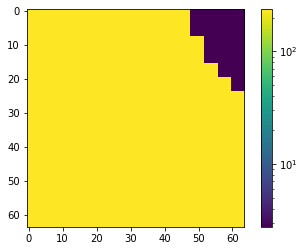

In [359]:
plt.imshow(lpf.hk.array[0,:,:])
print(np.unique(lpf.hk.array[4,:,:]))
plt.imshow(lpf.hk.array[4,:,:],norm=mpl.colors.LogNorm())
plt.colorbar()

## Soils data for variable use

In [35]:
uzf_path = gwfm_dir+'\\UZF_data'
soil_path = uzf_path+'\\wss_gsmsoil_CA'
# # Read in the soil map spatial data
# soil_gpd = gpd.read_file(uzf_path+'\\wss_gsmsoil_CA\\spatial\\gsmsoilmu_a_ca.shp')
# soil_gpd = soil_gpd.to_crs('EPSG:32610')
# # soil_gpd.plot()

In [36]:
soilKs_array = np.loadtxt(uzf_path+'/final_soilKs.tsv', delimiter = '\t')
soiln_array = np.loadtxt(uzf_path+'/final_soiln.tsv', delimiter = '\t')
soileps_array = np.loadtxt(uzf_path+'/final_soileps.tsv', delimiter = '\t')
soildepth_array = np.loadtxt(uzf_path+'/final_soildepth.tsv', delimiter = '\t')

# soilKs_array = fill_uzf(grid_uzf.Ksat_Rep, grid_uzf)
# soiln_array = fill_uzf(grid_uzf.Porosity_R, grid_uzf)
# soileps_array = fill_uzf(grid_uzf.EPS, grid_uzf)

# np.savetxt(uzf_path+'/final_soilKs.tsv', soilKs_array, delimiter = '\t')
# np.savetxt(uzf_path+'/final_soiln.tsv', soiln_array, delimiter = '\t')
# np.savetxt(uzf_path+'/final_soileps.tsv', soileps_array, delimiter = '\t')

# SFR

In [37]:
sfr_dir = gwfm_dir+'/SFR_data/'

Shapefile and csv of stream points for Sacramento County developed by Jason Weiner using the best available elevation datasets (10m, 1m DEMs, available Thalweg data, 1 ft Sac County elevation contours)

In [38]:
str_pts = pd.read_csv(sfr_dir+'/1_SASb/SASb_stream_pts_XYZ.csv')
str_pts = gpd.GeoDataFrame(str_pts, geometry=gpd.points_from_xy(str_pts.X_coord_UTM ,str_pts.Y_coord_UTM ))
str_pts.crs = 'epsg:32610'
str_pts = gpd.clip(str_pts, m_domain)


In [39]:
# Rivers and creeks in the larger area encompassing Cosumnes River in both South American and Cosumnes Subbasins
rivers = gpd.read_file(gwfm_dir+"/SFR_data/Sac_valley_rivers/Sac_valley_rivers.shp")
rivers = rivers.to_crs('EPSG:32610')
rivers_clip = gpd.clip(rivers, m_domain)

# # Split into individual streams/creeks
cr_ind = rivers_clip[rivers_clip.GNIS_Name == 'Cosumnes River']
# dc_ind = rivers_clip[rivers_clip.GNIS_Name == 'Deer Creek']
# # Pull out data for each river/creek
cr = rivers_clip.loc[cr_ind.index,]
# dc = rivers_clip.loc[dc_ind.index,]


In [40]:
# get str pts just for the Cosumnes
cr_buf = cr.copy()
cr_buf['geometry'] = cr_buf.buffer(200)
cos_pts = gpd.sjoin(str_pts, cr_buf)
# cos_pts.plot('Z_NAVD_88_m',legend=True)
# cos_pts

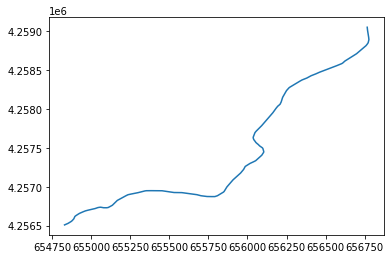

In [41]:
import fiona
from shapely.geometry import shape, mapping
from shapely.ops import linemerge

cr.geometry.values.crs = "epsg:32610"
geom = linemerge(cr.geometry.values)
# how often to interpolate a point
dline = 10
# # length of the LineString
length = int(geom.length)
point = np.zeros((int(length/dline)+1,3))
for i, distance in enumerate(range(0, int(length), dline)):
         point[i,:] = geom.interpolate(distance).coords[:][0]
point = point[:,[0,1]]
plt.plot(point[:,0],point[:,1])


In [42]:
raster_name = gwfm_dir+'/DEM_data/USGS_ten_meter_dem/regional_10m.tif'

# dem10 = rasterio.open(raster_name)

pnts = pd.DataFrame()
with rasterio.open(raster_name) as src:
    pnts['z'] = [sample[0] for sample in src.sample(point)]
pnts
pnts['easting'] = point[:,0]
pnts['northing'] = point[:,1]
pnts = pnts[pnts.z > -1E4]
pnts['z_original'] = pnts.z


<AxesSubplot:>

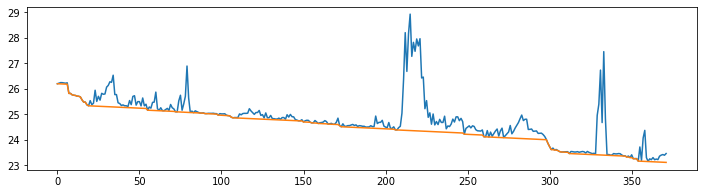

In [43]:
plt.figure(figsize = (12,3))
pnts.z_original.plot()
pnts['slope'] = 0.002
for i in np.arange(1,len(pnts)):
    if pnts.z.values[i] >= pnts.z.values[i-1]:
        # if strtop is greater than previous strtop use previous elevation minus the average slope
        slope = 0.0003
        pnts.z.values[i] = pnts.z.values[i-1] - slope*dline
        pnts.slope.values[i] = slope
pnts.z.plot()


In [44]:
pnts['Point_order'] = pnts.index
pnts_gpd = gpd.GeoDataFrame(pnts, geometry = gpd.points_from_xy(pnts.easting, pnts.northing))
pnts_gpd.crs = 'epsg:32610'

# # Samples the points every 10 meters to match with the 100 meter grid
grid_sfr = gpd.sjoin(grid_c_nums, pnts_gpd, how = "inner", op= "intersects")

# Set reach length for each reach based on the separation used to create the points from the line object, dline is 10 meters
grid_sfr['length_m'] = dline

# Dissolve the points again but using sum this time to get the total length of each reach
length_m_sums = grid_sfr.dissolve(by = 'node', aggfunc = 'sum').length_m.values

# Dissolves the points every 10 meters to the 200 meter spacing, using mean because the interested component is elevation
grid_sfr = grid_sfr.dissolve(by = 'node', aggfunc = 'mean')
grid_sfr.length_m = length_m_sums

mean stream length in cell is  41.68539325842696  meters
the 20.0 % quantile is 26.000000000000014  meters
the 75% quantile is 50.0  meters
even after setting cutoff at 26.000000000000014 m there is still stream connection


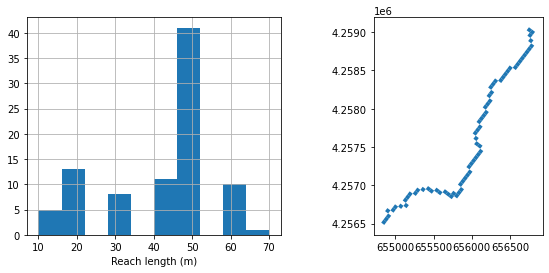

In [45]:
cutoff_quant = 0.2
print('mean stream length in cell is ', grid_sfr.length_m.mean(), ' meters')
print('the',cutoff_quant*100 , '% quantile is', grid_sfr.length_m.quantile(cutoff_quant), ' meters')
print('the 75% quantile is', grid_sfr.length_m.quantile(0.75), ' meters')

fig,ax=plt.subplots(1,2,figsize=(10,4))

grid_sfr.length_m.hist(ax=ax[0])
ax[0].set_xlabel('Reach length (m)')

length_threshold = grid_sfr.length_m.quantile(cutoff_quant)
grid_sfr.loc[grid_sfr.length_m >length_threshold].plot(ax=ax[1])
print('even after setting cutoff at', length_threshold, 'm there is still stream connection')

In [46]:
# remove reaches with a length less than 100m, short reaches with high conductance can lead to large errors
# in the SFR package and unneccessarily increase computation time
grid_sfr = grid_sfr.loc[grid_sfr.length_m >length_threshold]

# reorder reaches, and relabel the reach numbering after removing very shroty reaches
grid_sfr = grid_sfr.sort_values(by = 'Point_order')
grid_sfr['reach'] = np.arange(1,len(grid_sfr)+1)

In [47]:
# grid_sfr.drop('index_right',axis=1).to_file(gwfm_dir+'/Blodgett_Dam/geospatial/child_grid_sfr/child_grid_sfr.shp')
# grid_sfr = gpd.read_file(gwfm_dir+'/Blodgett_Dam/geospatial/child_grid_sfr/child_grid_sfr.shp')


In [48]:
# scenario = 'design'
# scenario = 'actual'
# scenario = 'new'
scenario = 'none'

In [49]:
XS8pt = pd.read_csv(sfr_dir+'8pointXS.csv')
# XSlocs = gpd.read_file(sfr_dir+'8pointXS_locs/8pointXS_locs.shp')
# new shapefile with an extra point for blodgett dam as site 16.5
XSlocs = gpd.read_file(gwfm_dir+'/Blodgett_Dam/geospatial/8pointXS_locs/8pointXS_locs.shp')
XSlocs.crs = 32610
XSlocs.geometry = XSlocs.buffer(5) # buffer XS locs to insure they cross with grid_sfr
XSg  = gpd.sjoin(grid_sfr, XSlocs, how = "inner", op= "intersects", lsuffix = 'sfr',rsuffix = 'xs')
XSg = XSg.drop_duplicates('Site') # drop second 17 that was duplicated by buffering

if scenario == 'none':
    # if no blodgett dam scenario then remove the extra cross section
    XSg = XSg.loc[(XSg.Site!=16.5)]
    XSg = XSg.loc[(XSg.Site!=16.2)]
#     XSg = XSg.loc[XSg.Site!=16.2]
elif scenario == 'actual':
    XSg_side = XSg.loc[XSg.Site==16.5]
    XSg_side.loc[:,'Site'] = 16.4
    XSg = XSg.append(XSg_side)
elif scenario == 'design':
    # may or may not want to remove the segment before
    XSg = XSg.loc[(XSg.Site!=16.2)]

# if the scneario is the restructured or designed dam then no change in the segments is necessary
# sort by site to make sure any XS added are properly included
XSg = XSg.sort_values('Site')
# print(len(XSg))


In [50]:
if scenario =='actual':
    pre_rch_num = XSg.loc[XSg.Site==16.2,'reach'].iloc[0]
    add_rch = grid_sfr.loc[grid_sfr.reach== pre_rch_num].copy()
    # for all reaches after added reach, need to add 1 to the reach number
    grid_sfr.loc[grid_sfr.reach>pre_rch_num,'reach'] = grid_sfr.loc[grid_sfr.reach>pre_rch_num,'reach'] +1
    # using the desired reach add 1 to just the duplicate
    add_rch.reach +=1
    # extra channel is 10m in length because it is there just to allow transfer of flow
    grid_sfr.loc[grid_sfr.reach== pre_rch_num,'length_m'] = 10
    add_rch.z = add_rch.z-10*add_rch.slope # adjust elevation of added reach to account for slope required
    grid_sfr = grid_sfr.append(add_rch).sort_values('reach')
    # adjust XSg to account for chnages to grid_sfr
    XSg.loc[XSg.reach>pre_rch_num,'reach'] +=1
    XSg.loc[XSg.Site==16.2,'reach']+=1 #add one to 16.2 because can't have two of the same reach
    
    # need to duplicate the reach for the segment
    add_rch_num = XSg.loc[XSg.Site==16.4,'reach'].iloc[0]
    add_rch = grid_sfr.loc[grid_sfr.reach== add_rch_num].copy()
    # for all reaches after added reach, need to add 1 to the reach number
    grid_sfr.loc[grid_sfr.reach>add_rch_num,'reach'] = grid_sfr.loc[grid_sfr.reach>add_rch_num,'reach'] +1
    # using the desired reach add 1 to just the duplicate
    add_rch.reach +=1

    # side channel is 70m in length from satellite
    # length of reach after dam can be kept the same but could be reduced slightly to account for addition of flooding/lake
    grid_sfr.loc[grid_sfr.reach== add_rch_num,'length_m'] = 70
    add_rch.z = add_rch.z-70*add_rch.slope # adjust elevation of added reach to account for slope required
    grid_sfr = grid_sfr.append(add_rch).sort_values('reach')
    
    # adjust XSg to account for chnages to grid_sfr
    XSg.loc[XSg.reach>add_rch_num,'reach'] +=1
    XSg.loc[XSg.Site==16.5,'reach']+=1 #add one to 16.5 because can't have two of the same reach


In [51]:
XSg['iseg'] = np.arange(1,len(XSg)+1) # add the segment that corresponds to each cross section

In [52]:

if scenario == 'dam':
    # designed scenario flow through dam only
    new_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/02_designed_XS.csv', skiprows=1)
elif scenario =='actual':
    # current situation, flow around dam and after dam
    new_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/03_actual_XS.csv', skiprows=1)
elif scenario =='new':
    # depending scenario, use different input cross sections for 16.5
    new_xs = pd.read_csv(gwfm_dir+'/Blodgett_Dam/geospatial/01_New_wide_XS.csv')

# if there is a scneario then need to add the new XS
if scenario != 'none':
    XS8pt = pd.concat([XS8pt,new_xs],axis=1)

In [53]:
# There is one reach for each cell that a river crosses
NSTRM = -len(grid_sfr)
# There should a be a stream segment if there are major changes
# in variables in Item 4 or Item 6
# no extra segments needed in child model
NSS =  len(XSg) 
# NSS = 2
# nparseg (int) number of stream-segment definition with all parameters, must be zero when nstrm is negative
NPARSEG = 0
CONST = 86400 # mannings constant for SI units, 1.0 for seconds, 86400 for days
# real value equal to the tolerance of stream depth used in
# computing leakage between each stream reach and active model cell
DLEAK = 0.0001 # unit in lengths, 0.0001 is sufficient for units of meters
IPAKCB = 155
# writes out stream depth, width, conductance, gradient when cell by cell
# budget is specified and istcb2 is the unit folder
ISTCB2 = 154
# isfropt = 1 is no unsat flow
# specifies whether unsat flow beneath stream or not, isfropt 2 has properties read for each reach, isfropt 3 also has UHC
# read for each reach, isfropt 4 has properties read for each segment (no UHC), 5 reads for each segment with UHC
ISFROPT = 1
# nstrail (int), number of trailing weave increments used to represent a trailing wave, used to represent a decrease 
# in the surface infiltration rate. Can be increased to improve mass balance, values between 10-20 work well with error 
# beneath streams ranging between 0.001 and 0.01 percent, default is 10 (only when isfropt >1)
NSTRAIL = 20
# isuzn (int) tells max number of vertical cells used to define the unsaturated zone beneath a stream reach (default is 1)
ISUZN = 1
#nsfrsets (int) is max number of different sets of trailing waves (used to allocate arrays), a value of 30 is sufficient for problems
# where stream depth varies often, value doesn't effect run time (default is 30)
NSFRSETS = 30
# IRTFLG (int) indicates whether transient streamflow routing is active, must be specified if NSTRM <0. If IRTFLG >0 then
# flow will be routed with the kinematic-wave equations, otherwise it should be 0 (only for MF2005), default is 1
IRTFLG = 1
# numtim (int) is number of sub time steps used to route streamflow. Streamflow time step = MF Time step / NUMTIM. 
# Default is 2, only when IRTFLG >0
NUMTIM = 2
# weight (float) is a weighting factor used to calculate change in channel storage 0.5 - 1 (default of 0.75) 
WEIGHT = 0.75
# flwtol (float), flow tolerance, a value of 0.00003 m3/s has been used successfully (default of 0.0001)
# 0.00003 m3/s = 2.592 m3/day
# if my units are in m3/day then flwtol should be in m3/day
FLWTOL = 3


sfr = flopy.modflow.ModflowSfr2(model = m_c, nstrm = NSTRM, nss = NSS, nparseg = NPARSEG, 
                           const = CONST, dleak = DLEAK, ipakcb = IPAKCB, istcb2 = ISTCB2, 
                          isfropt = ISFROPT, nstrail = NSTRAIL, isuzn = ISUZN, irtflg = IRTFLG, 
                          numtim = NUMTIM, weight = WEIGHT, flwtol = FLWTOL,
                                reachinput=True, transroute=True, tabfiles=False)

In [54]:
xs_sfr = grid_sfr.set_index('reach')
# set all reaches to start as segment 1 which will be changed iteratively based on the number of cross-sections
xs_sfr['iseg'] = 1
# add a column reach_new that will be changed iteratively as the segment number is changed
xs_sfr['reach_new'] = xs_sfr.index
# xs_sfr

In [55]:
## Given the reach number of each XS, the 718 reaches will be broken down into each segment
## create a new reach column based on XS reach number and 
for i in np.arange(0,len(XSg)):
    xs_r = XSg.reach.values[i]
    rchnum = xs_sfr.index[-1] - xs_r+1
    xs_sfr.reach_new.loc[xs_r:] = np.linspace(1,rchnum, rchnum)
    xs_sfr.iseg.loc[xs_r:] = XSg.iseg.values[i]
    
# for simple 1 XS model
# temp_reach = XSg.reach
# rchnum = xs_sfr.index[-1] - temp_reach+1
# xs_sfr.reach_new.loc[temp_reach:] = np.linspace(1,rchnum, rchnum)
# xs_sfr.iseg.loc[temp_reach:] = segcount
# segcount +=1

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
xs_sfr.reach_new = xs_sfr.reach_new.astype(int)


In [57]:
# Determine which layer the streamcell is in
# since the if statement only checks whether the first layer is greater than the streambed elevation, 
# otherwise it would be less than and zero (most should be in layer 0)
sfr_lay = np.zeros(len(grid_sfr))

for i in np.arange(0,nlay-1):
    # pull out elevation of layer bottom
    lay_elev = m_c.dis.botm.array[i, (grid_sfr.row.values-1).astype(int), (grid_sfr.column.values-1).astype(int)]
    for j in np.arange(0,len(grid_sfr)):
        # want to compare if streambed is lower than the layer bottom
        # 1 will be subtracted from each z value to make sure it is lower than the model top in the upper reaches
        if lay_elev[j] < (grid_sfr.z.values-1)[j]:
            sfr_lay[j] = i 
        


In [58]:
# KRCH, IRCH, JRCH, ISEG, IREACH, RCHLEN, STRTOP, SLOPE, STRTHICK, STRHC1, THTS, THTI, EPS, UHC

columns = ['KRCH', 'IRCH', 'JRCH', 'ISEG', 'IREACH', 'RCHLEN', 'STRTOP', 
               'SLOPE', 'STRTHICK', 'STRHC1', 'THTS', 'THTI', 'EPS', 'UHC']

sfr_rows = (grid_sfr.row.values-1).astype(int)
sfr_cols = (grid_sfr.column.values-1).astype(int)

sfr.reach_data.node = grid_sfr.index
sfr.reach_data.k = sfr_lay.astype(int)
sfr.reach_data.i = sfr_rows
sfr.reach_data.j = sfr_cols
sfr.reach_data.iseg = xs_sfr.iseg
sfr.reach_data.ireach = xs_sfr.reach_new
sfr.reach_data.rchlen = xs_sfr.length_m.values
sfr.reach_data.strtop = grid_sfr.z.values-1
sfr.reach_data.slope = grid_sfr.slope.values
 # a guess of 2 meters thick streambed was appropriate
sfr.reach_data.strthick = soildepth_array[sfr.reach_data.i, sfr.reach_data.j]
sfr.reach_data.thts = soiln_array[sfr.reach_data.i, sfr.reach_data.j]
sfr.reach_data.thti = sfr.reach_data.thts
sfr.reach_data.eps = soileps_array[sfr.reach_data.i, sfr.reach_data.j]


In [59]:
grid_sfr['dist_m'] = grid_sfr.length_m.cumsum()
grid_sfr.dist_m -= grid_sfr.dist_m.iloc[0]

## Setting stream hydraulic conductivity
Currently the streambed hydraulic conductivity is set based on the streambed mapping done by Constantine 2001. An alternative approach would be to use the top layer of the TPROGS mode for the first few meters at the ground surface as VKA values after upscaling and then cycling through all of these models. 

In [60]:
def elev_to_tprogs_layers(elev):
    # function to get the tprogs layers based on the given elevation
    # layer 0 is 80 meters, layer 1 is 79.5 meters, layer -1 is -80 meters
    elev_05 = np.round((elev) * 2) / 2 # dem rounded to the nearest 0.5
    elev_05[elev_05 >= 80] = 80# any elevation above 80 m is set to 80
    elev_indices = 160 - elev_05*2 # subtract the calculated row from 160 to get to 0 at 160 and 320 and -160
    return(elev_indices.astype(int))
    
def get_tprogs_for_elev(tprogs_arr, top_elev, bot_elev, **kwargs):
    rows = kwargs.get('rows', np.where(np.ones(m_c.dis.top.shape)==1)[0])
    cols = kwargs.get('cols', np.where(np.ones(m_c.dis.top.shape)==1)[1])
    top_indices = elev_to_tprogs_layers(top_elev)
    bot_indices = elev_to_tprogs_layers(bot_elev)
    # find tprogs layer for desired rows and columns
    top_indices = top_indices[rows, cols].astype(int)
    bot_indices = bot_indices[rows, cols].astype(int)
    # the first row of the array will be the top layer and will progress downward until the max bottom is reached
    # with NaNs for rows,cols where there are less layers indexed than the max
    tprogs_subset = np.full(shape = (np.max(bot_indices - top_indices).astype(int), len(rows)),
                       fill_value = np.nan, dtype = float)
    max_layers = np.max(bot_indices - top_indices)
    for k in np.arange(0,max_layers):
        layexist = (bot_indices-top_indices) > k # pick where data should be referenced
        tprogs_subset[k, layexist] = K[top_indices[layexist]+k, rows[layexist], cols[layexist]]
    # return grabbed data in array format if entire domain was used
    if len(rows) == m_c.dis.nrow*m_c.dis.ncol:
        tprogs_subset = np.reshape(tprogs_subset, (max_layers, m_c.dis.nrow,m_c.dis.ncol))
    return(tprogs_subset)

In [61]:
strbd_thick = 4
# get_tprogs_for_elev(K, m_c.dis.top.array, m_c.dis.top.array- np.linspace(1,4,m_c.dis.ncol), rows = sfr_rows, cols = sfr_cols)
strbd_tprogs = get_tprogs_for_elev(K, m_c.dis.top.array, m_c.dis.top.array- strbd_thick, rows = sfr_rows, cols = sfr_cols)
sfr_K = gmean(strbd_tprogs,axis=0)/100

In [62]:
# set stream hydraulic conductivity based on soil maps
# sfr.reach_data.strhc1 = soilKs_array[sfr.reach_data.i, sfr.reach_data.j]*scalingfactors.RIV
# set hydraulic conductivity smaller than aquifer hydraulic conductivity to limit interaction
# and ease the numerical stress
sfr.reach_data.strhc1 = sfr_K

# calibration of the whole river now by scaling conductivity
m_c.sfr.reach_data.strhc1 = m_c.sfr.reach_data.strhc1 
# next step is to break river up into reaches based on the grain size analysis or perhaps just by stream segment

## Segment data

In [63]:
sfr_seg = sfr.segment_data[0].copy()

In [64]:
# 15.0=14, 16.2 = 15, 16.4 = 16, 16.5 = 17, 17.0=18
# 14 outseg will be the side channel (16), 15 is the diversion before the Dam from 14 iupseg
# outseg for 15 will be -1 for the lake representing BLodgett Dam
# there is a diversion from 15 (segment to Dam) to 16 (side channel) to correct for the flood diversion
# so that below 500 cfs flow only goes to the side channel and above 500 cfs flow is 80% to Dam and 20% to side channel
# based on the idea that the side channel has a XS roughly 1/4 the size of the main channel and under high flows there
# will be more depth and force that flow will most likely be dominantly straight and avoid the side channel more
if scenario =='actual':
    pre_seg = XSg.loc[XSg.Site==16.2,'iseg'].iloc[0]
    side_seg = XSg.loc[XSg.Site==16.4,'iseg'].iloc[0]
if (scenario =='actual') | (scenario=='design'):
    post_seg = XSg.loc[XSg.Site==16.5,'iseg'].iloc[0]
# print(pre_seg,side_seg,post_seg)

In [176]:
# alternate version of segment data loading using if statements when filtering data rather than in a loop
sfr_seg.nseg = np.arange(1,NSS+1) 

sfr_seg.icalc = 2 # Mannings and 8 point channel XS is 2 with plain MF, 5 with SAFE
sfr_seg.outseg = sfr_seg.nseg+1 # the outsegment will typically be the next segment in the sequence
sfr_seg.iupseg = 0 # iupseg is zero for no diversion
# correct outseg and iupseg to account for Blodgett Dam scenario
if scenario =='design':
    sfr_seg.outseg[sfr_seg.nseg==post_seg-1]=-1 # segment before dam flows to lake
    sfr_seg.iupseg[sfr_seg.nseg==post_seg]=-1 # lake outflow is diverted to segment after dam
elif scenario == 'actual':
    sfr_seg.outseg[sfr_seg.nseg==pre_seg-1] = side_seg # the river should flow to the side segment first
     # there will be a diversion from the river to the dam above 500 cfs, of which 20% will be returned to the side channel
    sfr_seg.iupseg[sfr_seg.nseg==pre_seg] = pre_seg-1
    sfr_seg.iprior[sfr_seg.nseg==pre_seg] = -3 # iprior=-3 any flows above the flow specified will be diverted
    sfr_seg.flow[sfr_seg.nseg==pre_seg] = 500*0.3048*86400 # 500 cfs is the start of higher flow in the Cosumnes
    sfr_seg.outseg[sfr_seg.nseg==pre_seg] = -1 #outflow from short segment before Dam is the LAK for the dam

    # adjust for flow from pre dam segment back to side channel
    sfr_seg.iupseg[sfr_seg.nseg==side_seg] = pre_seg
    sfr_seg.iprior[sfr_seg.nseg==side_seg] = -2 # the flow diverted is a % of the total flow in the channel
    sfr_seg.flow[sfr_seg.nseg==side_seg] = 0.2 # the side channel is about 1/4 the size so 20% of flow should run through
    # divert flow from lake back into the segment after the dam
    sfr_seg.iupseg[sfr_seg.nseg==post_seg] = -1 # no need to change iprior because diversion is based on lake stage
    
# set a flow into segment 1 for the steady state model run
sfr_seg.flow[0] = 2.834*86400. # m3/day, originally 15 m3/s
# set the values for ET, runoff and PPT to 0 as the inflow will be small relative to the flow in the river
sfr_seg.runoff = 0.0
sfr_seg.etsw = 0.0
sfr_seg.pptsw = 0.0

# Manning's n data comes from Barnes 1967 UGSS Paper 1849 and USGS 1989 report on selecting manning's n
# RoughCH is only specified for icalc = 1 or 2
sfr_seg.roughch[(sfr_seg.icalc==1) | (sfr_seg.icalc==2)] = 0.048
# ROUGHBK is only specified for icalc = 2
sfr_seg.roughbk[(sfr_seg.icalc==2) | (sfr_seg.icalc==5)] = 0.083# higher due to vegetation


In [177]:
seg_df = pd.DataFrame(sfr_seg)
seg_df['lgrgrid'] = 1
seg_df['lgrseg'] = 1
sfr_seg = seg_df.to_records(index=False)

In [178]:
sfr.segment_data[0] = sfr_seg

In [179]:
# Pull out data for upstream and downstream reach of each segment
up_data = xs_sfr.drop_duplicates('iseg')
dn_data = xs_sfr.sort_values('reach_new',ascending = False).drop_duplicates('iseg').sort_values('iseg')


# Need to return to later and remove hard coding
# These are getting used for initial guesses
# Read in first stress period when ICALC = 1 or 2 and ISFROPT is 5
# Dataset 6b
sfr.segment_data[0].hcond1 = sfr.reach_data.strhc1[0]
sfr.segment_data[0].thickm1 = 2
sfr.segment_data[0].elevup = up_data.z.values
sfr.segment_data[0].width1 = 20
sfr.segment_data[0].depth1 = 1
sfr.segment_data[0].thts1 = 0.4
sfr.segment_data[0].thti1 = 0.15
sfr.segment_data[0].eps1 = 4
sfr.segment_data[0].uhc1 = sfr.reach_data.strhc1[0]

# Dataset 6c
sfr.segment_data[0].hcond2 = sfr.reach_data.strhc1[-1]
sfr.segment_data[0].thickm2 = 2
sfr.segment_data[0].elevdn = dn_data.z.values
sfr.segment_data[0].width2 = 20
sfr.segment_data[0].depth2 = 1
sfr.segment_data[0].thts2 = 0.4
sfr.segment_data[0].thti2 = 0.15
sfr.segment_data[0].eps2 = 4
sfr.segment_data[0].uhc2 = sfr.reach_data.strhc1[-1]


In [180]:
# Change column name to float type for easier referencing in iteration
XS8pt.columns = XS8pt.columns.astype('float')
# Pre-create dictionary to be filled in loop
sfr.channel_geometry_data = {0:{j:[] for j in np.arange(1,len(XSg)+1)}  }

xsnum = 1
for k in XSg.Site.values:
        pos = int(XS8pt.columns.get_loc(k))
        XCPT = XS8pt.iloc[:,pos].values
        ZCPT = XS8pt.iloc[:,pos+1].values
        ZCPT_min = np.min(ZCPT)
        ZCPT-= ZCPT_min
        sfr.channel_geometry_data[0][xsnum] = [XCPT, ZCPT]
        xsnum += 1



## Read in Parent SFR
First find parent SFR reach cells that overlap child model.
Then determine the corresponding segment for the first and last reach cell to be outside of the child grid.
Then remove theto remove and correct routing to go from the parent model to the child model. 

In [69]:
model_ws+'/MF.sfr'

'F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/WEL_SFR_RCH_layercake/MF.sfr'

In [70]:
# reload sfr package to remove any changes
sfr_p = flopy.modflow.ModflowSfr2.load(f = model_ws+'/MF.sfr',model=m_p)

loading sfr2 package file...

    unit 17 of package SFR already in use.

    Two packages of the same type, Replacing existing 'SFR' package.


In [71]:
grid_sfr_p = gpd.read_file(sfr_dir+'/final_grid_sfr/grid_sfr.shp')

In [72]:
rch_c = pd.DataFrame(sfr.reach_data)
seg_c = pd.DataFrame(sfr.segment_data[0])

# # get reach, segment and XS data
rch_p = pd.DataFrame(sfr_p.reach_data)
seg_p = pd.DataFrame(sfr_p.segment_data[0])
xs_dict = sfr_p.channel_geometry_data[0]

In [73]:
seg_p['lgrgrid'] = 0 # default is no lgrgrid
seg_p['lgrseg'] = 0 # default is no lgrseg

In [74]:


print('Segments',rch_p.iseg.unique().shape[0])
# find overlaps between SFR grid for the parent and the child grid
sfr_overlap = grid_c_py.rename({'p_row':'i','p_column':'j'},axis=1).\
join(rch_p.set_index(['i','j']),how='inner',on=['i','j'],rsuffix='sfrp')

rch_overlap = sfr_overlap.reachID.unique() #reaches to drop
rch_min = sfr_overlap.reachID.min()
rch_max = sfr_overlap.reachID.max()
seg_overlap = np.sort(sfr_overlap.iseg.unique()) # segments to drop
seg_min = rch_p.set_index('reachID').loc[rch_min].iseg
seg_max = rch_p.set_index('reachID').loc[rch_max].iseg

# add one to the segment starting in the first reach that overlaps the child grid
rch_p.loc[rch_p.reachID >= rch_min,'iseg'] +=1
# add one to the segment starting in the first reach that is past the child grid
rch_p.loc[rch_p.reachID > rch_max,'iseg'] +=1

print('Segments',rch_p.iseg.unique().shape[0])

## correct sub reach number for altered segments
rch_fix = rch_p.set_index('iseg').loc[(rch_p.groupby('iseg').min().ireach >1),:]
for n in rch_fix.index.unique().values:
    rch_fix.loc[n, 'ireach'] = np.arange(1,len(rch_fix.loc[n])+1)
rch_fix = rch_fix.reset_index().set_index('reachID')

rch_p = rch_p.set_index('reachID')
rch_p.loc[rch_fix.index] = rch_fix

# update XS dict to account for new segments due to grid crossing
new_dict = {}
new_s = 0
for key, value in xs_dict.items():
    key += new_s
    new_dict[key] = value
    if key==seg_min:
        new_s +=1
        new_dict[key + 1] = value
    elif key == seg_max:
        new_s+=1
        new_dict[key + 1] = value
# segments on the edge of child grids
edge_segs = rch_fix.iseg.unique()

# add segments in to update grid
for n in edge_segs:
    seg_p.loc[seg_p.nseg > n, 'nseg'] +=1
    seg_p.loc[seg_p.nseg > n, 'outseg'] +=1
    seg_add = seg_p.loc[seg_p.nseg == n]
    seg_add.nseg +=1
    seg_add.outseg +=1
    seg_p = seg_p.append(seg_add)
# clean up segment data before setting in sfr package
seg_p = seg_p.sort_values('nseg')
# reset last outseg as 0
seg_p.loc[seg_p.nseg==seg_p.nseg.max(), 'outseg'] = 0

# set sfr segments covered by the child grids as -1, 0
for n in np.arange(0,len(edge_segs)/2, dtype=int):
    seg_p.loc[seg_p.nseg>=edge_segs[n],'lgrgrid'] = -1
    seg_p.loc[seg_p.nseg>=edge_segs[n+1],'lgrgrid'] = 0
    seg_p.loc[seg_p.nseg==edge_segs[n+1],'lgrgrid'] = n+1 # set
    seg_p.loc[seg_p.nseg==edge_segs[n+1],'lgrseg'] = sfr.segment_data[0].nseg.max()

Segments 27
Segments 29


C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [75]:
# fig,ax = plt.subplots(figsize=(6,6))
# # grid_sfr.plot(ax=ax)
# child_grid.plot(ax=ax,color='None',edgecolor='black')
# # grid_c_num

# temp_plot = gpd.overlay(grid_sfr_p,child_grid)
# temp_plot.plot('reach',ax=ax,legend=False)
# # Create annotation
# for j in np.arange(0,len(temp_plot)):
#     ax.annotate(
#         temp_plot.reach[j],                      # Use `label` as label
#         (temp_plot.geometry.centroid.x[j], temp_plot.geometry.centroid.y[j]),         # Place label at end of the bar
#         xytext=(0, 0),          # Vertically shift label by `space`
#         textcoords="offset points", # Interpret `xytext` as offset in points
#         ha='center')                      # Vertically align label differently for
#                                         # positive and negative values.
# xmin,ymin, xmax, ymax = child_grid.buffer(200).total_bounds
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

In [76]:
sfr_p.reach_data = rch_p.reset_index().to_records(index=None)
sfr_p.segment_data[0] = seg_p.to_records(index=None)
sfr_p.channel_geometry_data[0] = new_dict

In [230]:
# fix dataset 5 to account for updated segment numbering, includes itmp
ds5 = sfr_p._dataset_5
for key in ds5.keys():
    ds5[key][0] = int(m_p.sfr.nss*ds5[key][0]/np.abs(ds5[key][0]))
sfr_p.dataset_5 = ds5



In [77]:
# sfr check didn't have any issues with new variables for lgr, but may need to update flopy as model.version
# won't work for activating the read/write of them

# LAK

In [78]:
lak_extent = gpd.read_file(gwfm_dir+'/Blodgett_Dam/geospatial/bathymetry_extent/bathymetry_extent.shp')
lak_extent.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 126°W to 120°W - by country
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

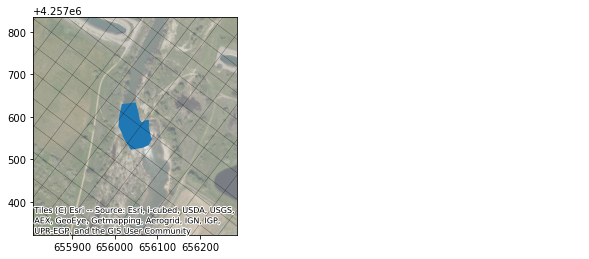

In [79]:
fig,ax=plt.subplots()

lak_extent.plot(ax=ax)
xmin,ymin, xmax, ymax = lak_extent.buffer(200).total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

grid_c_nums.plot(ax=ax,color='None',edgecolor='black', linewidth=0.1)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery,
                crs='epsg:26910', alpha = 0.6)

In [80]:
if (scenario == 'actual') | (scenario == 'design'):
    lak_buf = lak_extent.copy()
    lak_buf.geometry = lak_buf.buffer(100)
    # grid_sfr.drop('index_right',axis=1)
    # gpd.sjoin(grid_c_nums, lak_buf, how='left',op='contains').plot()
    lak_grid = gpd.overlay(grid_c_nums, lak_extent, how='intersection')
    # get cells with more than 1/3 of Blodgett Dam "lake extent"
    lak_grid = lak_grid.loc[lak_grid.geometry.area > delr[lak_grid.row]*delr[lak_grid.column]/3]

    # Set empty array of zeros for nonlake cells
    lakarr = np.zeros((nlay, nrow,ncol))
    # Each lake is given a different integer, and needs to be specified depending on the layer
    lakarr[0,(lak_grid.row.values-1).astype(int),(lak_grid.column.values-1).astype(int)] = 1

    bdlknc = np.zeros(( nrow,ncol))
    # set blodgett dam Ksat same as stream Ksat at same location, leakance is K/lakebed thickness
    lkbd_thick = sfr.reach_data.strthick[XSg.loc[XSg.Site==16.5].reach]
    lkbd_K = sfr_K[XSg.loc[XSg.Site==16.5].reach]
    bdlknc[(lak_grid.row.values-1).astype(int),(lak_grid.column.values-1).astype(int)] = lkbd_K/lkbd_thick

    lakeRst = rasterio.open(gwfm_dir+'/Blodgett_Dam/geospatial/DEMs/hecras_1m_bathymetry.tif')
    lakeBottom = lakeRst.read(1)
    noDataValue = np.copy(lakeBottom[0,0])
    #replace value for np.nan
    lakeBottom[lakeBottom==noDataValue]= np.nan
    # the stage for the stream section just after the dam is 23.04 m thus the bottom of the lake must be set 10 ft below that
    lakeBottom = lakeBottom - 10
    lakeBottom *= 0.3048

    # get raster minimum and maximum 
    minElev = np.nanmin(lakeBottom)
    maxElev = np.nanmax(lakeBottom)
    print('Min bottom elevation %.2f m., max bottom elevation %.2f m.'%(minElev,maxElev))

    # steps for calculation
    nSteps = 151

    # lake bottom elevation intervals
    elevSteps = np.round(np.linspace(minElev,maxElev,nSteps),2)


    # definition of volume function
    def calculateVol_A(elevStep,elevDem,lakeRst):
        tempDem = elevStep - elevDem[elevDem<elevStep]
        tempArea = len(tempDem)*lakeRst.res[0]*0.3048*lakeRst.res[1]*0.3048
        tempVol = tempDem.sum()*lakeRst.res[0]*0.3048*lakeRst.res[1]*0.3048
        return(tempVol, tempArea)
    # calculate volumes, areas for each elevation
    volArray = [0]
    saArray = [0]
    for elev in elevSteps[1:]:
        tempVol,tempArea = calculateVol_A(elev,lakeBottom,lakeRst)
        volArray.append(tempVol)
        saArray.append(tempArea)


    # print("Lake bottom elevations %s"%elevSteps)
    # volArrayMCM = [round(i/1000000,2) for i in volArray]
    # print("Lake volume in million of cubic meters %s"%volArrayMCM)

In [81]:
if (scenario == 'actual') | (scenario == 'design'):
    # Exactly 151 lines must be included within each lake bathymetry input file and each line must contain 1 value 
    #  of lake stage (elevation), volume, and area (3 numbers per line) if the keyword “TABLEINPUT” is specified in item 1a.
    # A separate file is required for each lake. 

    stages = minElev+0.1
    # (ssmn, ssmx) max and min stage of each lake for steady state solution, there is a stage range for each lake
    # so double array is necessary
    stage_range = [[minElev, maxElev]]

    # lake stage (elevation), volume, and area (3 numbers per line)
    lak_depth = elevSteps - elevSteps[0]
    bathtxt = np.column_stack((elevSteps, volArray, saArray))

    np.savetxt(m_c.model_ws+'/MF_child.txt', bathtxt, delimiter = '\t')


    ## Need to specify flux data
    # Dict of lists keyed by stress period. The list for each stress period is a list of lists,
    # with each list containing the variables PRCPLK EVAPLK RNF WTHDRW [SSMN] [SSMX] from the documentation.
    # flux_data = np.zeros((nrow,ncol))

    flux_data = {0:{0:[0,0,0,0]}}
    # filler value for bdlknc until soil map data is loaded by uzf
    lak = flopy.modflow.ModflowLak(model = m_c, lakarr = lakarr, bdlknc = bdlknc,  stages=stages, 
                                   stage_range=stage_range, flux_data = flux_data,tabdata= True, 
                                   tab_files='MF.txt', tab_units=[57],ipakcb=55)

    # the lak package doesn't specify the tab file unit number when the files are written
    # example:      110.0     100.0     170.0   22   Item 3:  STAGES,SSMN,SSMX,IUNITLAKTAB

    lak.options = ['TABLEINPUT']

    # need to reset tabdata as True before writing output for LAK
    lak.tabdata = True

## LAK Gage package

In [82]:
if (scenario == 'actual') | (scenario == 'design'):
    # numgage is total number of gages
    # gage_data (list, or array), includes 2 to 3 entries (LAKE UNIT (OUTTYPE)) for each LAK entry
    #  4 entries (GAGESEG< GAGERCH, UNIT, OUTTYPE) for each SFR package entry

    lak_gage_data = [[-1, -37, 1]]
    lak_file = 'MF_child.lak.gage'
    lak_file_out = 'MF_child.lak.gage.out'
    gag = flopy.modflow.ModflowGage(model=m_c,numgage= 1,gage_data=lak_gage_data,file =[lak_file_out], filenames =[lak_file])


# Output Control (OC)

In [83]:
end_date = pd.to_datetime(strt_date)+pd.DateOffset(days = nper-1)

In [84]:
# Output control
# default unit number for heads is 51, cell by cell is 53 and drawdown is 52
# (0,0) is (stress period, time step)

# For later model runs when all the data is needed to be saved
spd = { (j,0): ['save head', 'save budget'] for j in np.arange(0,nper,1)}

# get the first of each month to print the budget
month_intervals = (pd.date_range(strt_date,end_date, freq="MS")-pd.to_datetime(strt_date)).days

for j in month_intervals:
    spd[j,0] = ['save head', 'save budget','print budget']
    
oc = flopy.modflow.ModflowOc(model = m_c, stress_period_data = spd, compact = True)

# Solver

In [85]:
# iter_mo max outer iters, ter_mi = max inner iters, close_r residual criterion for stopping iteration
# close_h is alternate criterion for nonlinear problem, and is head closure which should be smaller than residual closer
# ipunit =0 means no info on solver, ipunit=1 means output about solver issues is written
# if iter_mo >1 then closer_r is used not close_h and closer_r is compared to 
# the square root of the inner product of the residuals (the residual norm)
# adamp =0 is std damping, adamp=1 is adaptive damping that further decreases or increases damping based on picard
# iteration sucess
#adamp is 0.7 to resolve issues with heads oscillating near solution +1 m
# damp_lb = lower bound, rate_d is rate of increase of damping based picard iteration success

# pcgn = flopy.modflow.ModflowPcgn(m, iter_mo = 100, iter_mi=60, close_r=1e-01, close_h=1e-02, ipunit=28)
#                                adamp=1, damp=0.7, damp_lb=0.1, rate_d=0.01)


# mxiter = max outer iterations, iter1 = max inner iterations
pcg = flopy.modflow.ModflowPcg(model = m_c, mxiter = 100, iter1=60, rclose=1e-01, hclose=1e-02)
#                                adamp=1, damp=0.7, damp_lb=0.1, rate_d=0.01)

### Correct unit numbers


In [274]:
# correct unit numbers for input packages
for pck in m_c.get_package_list():
    getattr(m_c, pck).unit_number[0] = getattr(m_p, pck).unit_number[0] + 100
# still need to correct output package numbers

In [290]:
# m_c.write_name_file()

# Check model

In [86]:
m_c.check()



MF_child MODEL DATA VALIDATION SUMMARY:
  No errors or warnings encountered.

  Checks that passed:
    Unit number conflicts
    Compatible solver package
    DIS package: zero or negative thickness
    DIS package: thin cells (less than checker threshold of 1.0)
    DIS package: nan values in top array
    DIS package: nan values in bottom array
    BAS6 package: isolated cells in ibound array
    BAS6 package: Not a number
    LPF package: zero or negative horizontal hydraulic conductivity values
    LPF package: zero or negative vertical hydraulic conductivity values
    LPF package: negative horizontal anisotropy values
    LPF package: horizontal hydraulic conductivity values below checker threshold of 1e-11
    LPF package: horizontal hydraulic conductivity values above checker threshold of 100000.0
    LPF package: vertical hydraulic conductivity values below checker threshold of 1e-11
    LPF package: vertical hydraulic conductivity values above checker threshold of 100000.0


In [316]:
# when coding I set the child model as convertible but reset to confined to match
# m_p.lpf.sy.array
# # 0 is confined, 1 is convertile for laytyp, 0 inactive, 1 active for wetting (laywet)
# m_p.lpf.laytyp.array, m_p.lpf.laywet.array
# m_c.lpf.laytyp.array, m_c.lpf.laywet.array

(array([1, 1, 1, 1, 1, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0]))

In [88]:
m_p.model_ws = loadpth+ 'LGR_SFR'
# m_p.write_input()


changing model workspace...
   F:/WRDAPP/GWFlowModel/Cosumnes/Cosumnes_Blodgett_10yr/LGR_SFR

Writing packages:
   Package:  DIS
   Package:  BAS6
   Package:  LPF
   Package:  SFR
   Package:  GHB
   Package:  CHD
   Package:  RCH
   Package:  WEL
   Package:  HOB
   Package:  OC
   Package:  PCG
 


In [144]:
# Writing the MODFLOW data files
# m_c.write_input()


In [147]:
# lgr_ex_path = "C://WRDAPP/MODFLOW-LGR/mflgr.1_2/test-run/sfrex2"
# lgr_ex_nam = "C://WRDAPP/MODFLOW-LGR/mflgr.1_2/test-run/sfrex2/sfrex2.lgr"

# lgr_ex_path = "C:/WRDAPP/MODFLOW-LGR/mflgr.1_2/test-run/sfrex2/"
# lgr_ex_nam =  "C:/WRDAPP/MODFLOW-LGR/mflgr.1_2/test-run/sfrex2/sfrex2.lgr"

# lgr_ex = flopy.modflowlgr.ModflowLgr.load(f = lgr_ex_nam, model_ws = lgr_ex_path, 
#                                  version = 'mflgr')

# Create LGR structure
NPRBEG = row number of parent grid where child begins (END for end, l for   layer, c for column)  
NCPP = num child cells spanning a parent cell, NPCPPL for layers  
ibflg = defines interface of child and parent (unique value for each child)

## Lgr 

In [341]:
lgr_ws = loadpth+'LGR_SFR'

In [309]:
# lgr_child.ibflg = 59


In [148]:
# start with 2 times refinement in both horizontal and vertical
# max refinement is either 3-4 times in horizontal
# identify LGR child structure
lgr_child = flopy.modflowlgr.LgrChild(ishflg = 1, ibflg=-59,
                                      nplbeg = 0, nprbeg = beg_row, npcbeg = beg_col,
                        nplend = 0, nprend = end_row-1, npcend = end_col-1,
                        ncpp = ncpp, ncppl = ncppl)

In [149]:
# default model_ws is the present working directory
lgr = flopy.modflowlgr.ModflowLgr(modelname = 'Blodgett_LGR', namefile_ext = 'lgr',
                         version = 'mflgr', exe_name = 'mflgr.exe',
                         parent = m_p, children = [m_c], children_data = lgr_child, model_ws = lgr_ws)

In [150]:
lgr.write_input()


Writing packages:
   Package:  DIS
   Package:  BAS6
   Package:  LPF
   Package:  SFR
   Package:  GHB
   Package:  CHD
   Package:  RCH
   Package:  WEL
   Package:  HOB
   Package:  OC
   Package:  PCG
 


In [143]:
# with open(filename, 'r') as file:
#     # read a list of lines into data
#     data = file.readlines()
# # len(data)
# for i in np.arange(0,len(data)):
#     line = line_parse(data[i])
#     print(line)

#### Edit Parent SFR

In [249]:
sfr_p.nstrm = -1*nrch
sfr_p.write_file()

In [250]:
from flopy.utils.flopy_io import line_parse
# work around to output SFR file and then adjust it to account for LGRGRID and LGRSEG auxiliary variables
filename = lgr_model_ws+'/MF.sfr'
fileout = lgr_model_ws +'/MF_lgr.sfr'
f = open(filename, "r")
out = open(fileout, 'w')

line = f.readline() # comment header
out.writelines(line)
line = f.readline() # options
# out.writelines(line)
line = f.readline() # dataset 1c
line = line_parse(line)
line = " ".join(line + ["AUX LGRGRID AUX LGRSEG"] +["\n"])
out.writelines(line)
nrch = int(line_parse(line)[0])
#reach data
for i in np.arange(0,nrch):
    line = f.readline()
    out.writelines(line)
# dataset 5
line=f.readline()
out.writelines(line)
nseg = int(line_parse(line)[0])
count = 1
# dataset 6
while count < nseg:
    line = f.readline()
    line = line_parse(line)
    lgrgrid = str(sfr_p.segment_data[0].lgrgrid[count-1])
    lgrseg = str(sfr_p.segment_data[0].lgrseg[count-1])
    icalc = int(line[1])
    count = int(line[0])
    line = " ".join(line + [lgrgrid, lgrseg] +["\n"])
#     print(line)
    out.writelines(line)
    if icalc == 2:
        skip = 2
    elif icalc ==4:
        skip = 3
    for i in np.arange(0,skip):
        line = f.readline()
        out.writelines(line)
while line is not '':
    line = f.readline()
    out.writelines(line)
out.close()
f.close()
os.remove(lgr_model_ws+'/MF.sfr')
os.rename(lgr_model_ws+'/MF_lgr.sfr',lgr_model_ws+'/MF.sfr') #current, new


#### Edit Child SFR

In [247]:
sfr.nstrm = NSTRM

sfr.write_file()

In [248]:
from flopy.utils.flopy_io import line_parse
# work around to output SFR file and then adjust it to account for LGRGRID and LGRSEG auxiliary variables
filename = lgr_model_ws+'/MF_child.sfr'
fileout = lgr_model_ws +'/MF_child_lgr.sfr'
f = open(filename, "r")
out = open(fileout, 'w')

line = f.readline() # comment header
out.writelines(line)
line = f.readline() # options
line = line_parse(line)
# out.writelines(line)
line = f.readline() # dataset 1c
line = line_parse(line)
line = " ".join(line + ["AUX LGRGRID AUX LGRSEG"] +["\n"])
out.writelines(line)
nrch = int(line_parse(line)[0])
#reach data
for i in np.arange(0,nrch):
    line = f.readline()
    out.writelines(line)
# dataset 5
line=f.readline()
out.writelines(line)
nseg = int(line_parse(line)[0])
count = 1
# dataset 6
while count < nseg:
    line = f.readline()
    line = line_parse(line)
    lgrgrid = str(sfr.segment_data[0].lgrgrid[count-1])
    lgrseg = str(sfr.segment_data[0].lgrseg[count-1])
    icalc = int(line[1])
    count = int(line[0])
    line = " ".join(line + [lgrgrid, lgrseg] +["\n"])
#     print(line)
    out.writelines(line)
    if icalc == 2:
        skip = 2
    elif icalc ==4:
        skip = 3
    for i in np.arange(0,skip):
        line = f.readline()
        out.writelines(line)
while line is not '':
    line = f.readline()
    out.writelines(line)
out.close()
f.close()

os.remove(lgr_model_ws+'/MF_child.sfr')
os.rename(lgr_model_ws+'/MF_child_lgr.sfr',lgr_model_ws+'/MF_child.sfr') #current, new


## Lgr Testing

In [64]:
def _parse_1c(line, reachinput, transroute):
    """
    Parse Data Set 1c for SFR2 package.
    See http://water.usgs.gov/nrp/gwsoftware/modflow2000/MFDOC/index.html?sfr.htm for more info

    Parameters
    ----------
    line : str
        line read from SFR package input file

    Returns
    -------
        a list of length 13 containing all variables for Data Set 6a

    """
    na = 0
    # line = _get_dataset(line, [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 1, 30, 1, 2, 0.75, 0.0001, []])
    # line = line.strip().split()
    line = line_parse(line)

    nstrm = int(line.pop(0))
    nss = int(line.pop(0))
    nsfrpar = int(line.pop(0))
    nparseg = int(line.pop(0))
    const = float(line.pop(0))
    dleak = float(line.pop(0))
    ipakcb = int(line.pop(0))
    istcb2 = int(line.pop(0))

    isfropt, nstrail, isuzn, nsfrsets = na, na, na, na
    if reachinput:
        nstrm = abs(nstrm)  # see explanation for dataset 1c in online guide
        isfropt = int(line.pop(0))
        if isfropt > 1:
            nstrail = int(line.pop(0))
            isuzn = int(line.pop(0))
            nsfrsets = int(line.pop(0))
    if nstrm < 0:
        isfropt = int(line.pop(0))
        if isfropt > 1:
            nstrail = int(line.pop(0))
            isuzn = int(line.pop(0))
            nsfrsets = int(line.pop(0))

    irtflg, numtim, weight, flwtol = na, na, na, na
    if nstrm < 0 or transroute:
        irtflg = int(_pop_item(line))
        if irtflg > 0:
            numtim = int(line.pop(0))
            weight = float(line.pop(0))
            flwtol = float(line.pop(0))

    # auxiliary variables (MODFLOW-LGR)
    option = [
        line[i]
        for i in np.arange(1, len(line))
        if "aux" in line[i - 1].lower()
    ]

    return (
        nstrm,
        nss,
        nsfrpar,
        nparseg,
        const,
        dleak,
        ipakcb,
        istcb2,
        isfropt,
        nstrail,
        isuzn,
        nsfrsets,
        irtflg,
        numtim,
        weight,
        flwtol,
        option,
    )

In [558]:
def _pop_item(line):
    try:
        return float(line.pop(0))
    except:
        return 0.0
    
def _parse_6a(line, option):
    line = line_parse(line)

    xyz = []
    # handle any aux variables at end of line
    for s in line:
        if s.lower() in option:
            xyz.append(s.lower())

    na = 0
    nseg = int(_pop_item(line))
    icalc = int(_pop_item(line))
    outseg = int(_pop_item(line))
    iupseg = int(_pop_item(line))
    iprior = na
    nstrpts = na

    if iupseg > 0:
        iprior = int(_pop_item(line))
    if icalc == 4:
        nstrpts = int(_pop_item(line))

    flow = _pop_item(line)
    runoff = _pop_item(line)
    etsw = _pop_item(line)
    pptsw = _pop_item(line)
    roughch = na
    roughbk = na

    if icalc in [1, 2]:
        roughch = _pop_item(line)
    if icalc == 2:
        roughbk = _pop_item(line)

    cdpth, fdpth, awdth, bwdth = na, na, na, na
    if icalc == 3:
        cdpth, fdpth, awdth, bwdth = map(float, line)
    
    if option[0] == 'LGRGRID':
        lgrgrid = int(_pop_item(line))
        lgrseg = int(_pop_item(line))
    else:
        lgrgrid = []
        lgrseg = []
    return (
        nseg,
        icalc,
        outseg,
        iupseg,
        iprior,
        nstrpts,
        flow,
        runoff,
        etsw,
        pptsw,
        roughch,
        roughbk,
        cdpth,
        fdpth,
        awdth,
        bwdth,
        lgrgrid,
        lgrseg,
        xyz,
    )

In [80]:
lgr_ws =loadpth+ 'LGR_SFR'
filename = lgr_ws+'/test_run_read_lgr_sfr.sfr'
f = open(filename, "r")

line = f.readline()
print(line)
(nstrm, nss,nsfrpar, nparseg,const, dleak,  ipakcb, istcb2, isfropt, 
nstrail,  isuzn,  nsfrsets, irtflg,  numtim, weight,   flwtol, 
 option,) =_parse_1c(line, False, False)

i=0
itmp = 3
# Item 6
current = ModflowSfr2.get_empty_segment_data(
    nsegments=itmp, aux_names=option# container to hold any auxiliary variables
)
print(current.shape)
print(len(current.dtype))
current_aux = {}
# these could also be implemented as structured arrays with a column for segment number
current_6d = {}
current_6e = {}
# print(i,icalc,nstrm,isfropt,reachinput)
for j in range(itmp):
    line = f.readline()
    print(line)
    dataset_6a = _parse_6a(line, option)
    print(_parse_6a(line, option))
    current_aux[j] = dataset_6a[-1]
    dataset_6a = dataset_6a[:-1]  # drop xyz
    icalc = dataset_6a[1]
    # link dataset 6d, 6e by nseg of dataset_6a
    temp_nseg = dataset_6a[0]
    # datasets 6b and 6c aren't read under the conditions below
    # see table under description of dataset 6c,
    # in the MODFLOW Online Guide for a description
    # of this logic
    # https://water.usgs.gov/ogw/modflow-nwt/MODFLOW-NWT-Guide/sfr.htm
    dataset_6b, dataset_6c = (0,) * 9, (0,) * 9
    if not (
        isfropt in [2, 3] and icalc == 1 and i > 1
    ) and not (isfropt in [1, 2, 3] and icalc >= 2):
        line = f.readline()
        print(line)
        dataset_6b = _parse_6bc(
            line,
            icalc,
            nstrm,
            isfropt,
            reachinput,
            per=i,
        )
        line = f.readline()
        print(line)
        dataset_6c = _parse_6bc(
            line,
            icalc,
            nstrm,
            isfropt,
            reachinput,
            per=i,
        )
    current[j] = dataset_6a + dataset_6b + dataset_6c



43    3    0    0  1. 1.E-4    0   19   AUX LGRGRID AUX LGRSEG ;NSTRM NSS NSFRPAR NPARSEG CONST DLEAK ISTCB1  ISTCB2  [ISFROPT] [NSTRAIL] [ISUZN] [NSFRSETS]



TypeError: add_to_dtype() missing 1 required positional argument: 'field_types'

In [119]:
from inspect import getsource
print(getsource(_parse_6bc))

NameError: name '_parse_6bc' is not defined

In [76]:
from flopy.modflow.mfsfr2 import _parse_6bc,_isnumeric
from flopy.modflow.mfsfr2 import _parse_6a
from flopy.modflow import ModflowSfr2
dir(ModflowSfr2)


In [75]:
def _get_dataset(line, dataset):
    # interpret number supplied with decimal points as floats, rest as ints
    # this could be a bad idea (vs. explicitly formatting values for each dataset)
    for i, s in enumerate(line_parse(line)):
        try:
            n = int(s)
        except:
            try:
                n = float(s)
            except:
                break
        dataset[i] = n
    return dataset

def _parse_6bc(line, icalc, nstrm, isfropt, reachinput, per=0):
    """
    Parse Data Set 6b for SFR2 package.
    See http://water.usgs.gov/nrp/gwsoftware/modflow2000/MFDOC/index.html?sfr.htm for more info

    Parameters
    ----------
    line : str
        line read from SFR package input file

    Returns
    -------
        a list of length 9 containing all variables for Data Set 6b

    """
    nvalues = sum([_isnumeric(s) for s in line_parse(line)])
    line = _get_dataset(line, [0] * nvalues)

    hcond, thickm, elevupdn, width, depth, thts, thti, eps, uhc = [0.0] * 9

    if isfropt in [0, 4, 5] and icalc <= 0:
        hcond = line.pop(0)
        thickm = line.pop(0)
        elevupdn = line.pop(0)
        width = line.pop(0)
        depth = line.pop(0)
    elif isfropt in [0, 4, 5] and icalc == 1:
        hcond = line.pop(0)
        if isfropt in [4, 5] and per > 0:
            pass
        else:
            thickm = line.pop(0)
            elevupdn = line.pop(0)
            # depth is not read if icalc == 1; see table in online guide
            width = line.pop(0)
            thts = _pop_item(line)
            thti = _pop_item(line)
            eps = _pop_item(line)
        if isfropt == 5 and per == 0:
            uhc = line.pop(0)
    elif isfropt in [0, 4, 5] and icalc >= 2:
        hcond = line.pop(0)
        if isfropt in [4, 5] and per > 0 and icalc == 2:
            pass
        else:
            thickm = line.pop(0)
            elevupdn = line.pop(0)
            if isfropt in [4, 5] and per == 0:
                # table in online guide suggests that the following items should be present in this case
                # but in the example
                thts = _pop_item(line)
                thti = _pop_item(line)
                eps = _pop_item(line)
                if isfropt == 5:
                    uhc = _pop_item(line)
            else:
                pass
    elif isfropt == 1 and icalc <= 1:
        width = line.pop(0)
        if icalc <= 0:
            depth = line.pop(0)
    elif isfropt in [2, 3]:
        if icalc <= 0:
            width = line.pop(0)
            depth = line.pop(0)

        elif icalc == 1:
            if per > 0:
                pass
            else:
                width = line.pop(0)

        else:
            pass
    else:
        pass
    return hcond, thickm, elevupdn, width, depth, thts, thti, eps, uhc

